In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("deepcontractor/swarm-behaviour-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/swarm-behaviour-classification


In [119]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping
import time
from keras import regularizers
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [3]:
os.listdir('/kaggle/input/swarm-behaviour-classification')

['Swarm_Behaviour.csv']

In [4]:
df = pd.read_csv('/kaggle/input/swarm-behaviour-classification/Swarm_Behaviour.csv')
df.head()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.0,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.0,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.3,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.0,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.0,12,0,0.0


In [5]:
df.shape

(23309, 2401)

In [6]:
df.isnull().sum()

x1                 0
y1                 0
xVel1              0
yVel1              0
xA1                0
                  ..
xC200              0
yC200              0
nAC200             0
nS200              0
Swarm_Behaviour    0
Length: 2401, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23309 entries, 0 to 23308
Columns: 2401 entries, x1 to Swarm_Behaviour
dtypes: float64(2001), int64(400)
memory usage: 427.0 MB


In [8]:
df.isnull().values.any()

False

In [9]:
df.duplicated().sum()

4607

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.shape

(18702, 2401)

In [12]:
df['Swarm_Behaviour'].value_counts()

Swarm_Behaviour
0.0    12158
1.0     6544
Name: count, dtype: int64

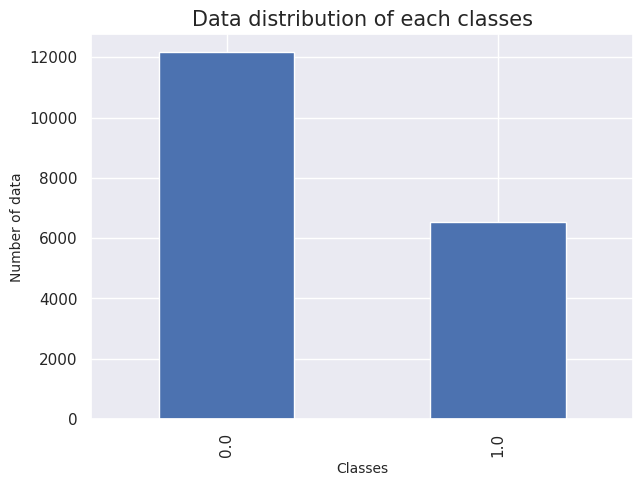

In [13]:
df['Swarm_Behaviour'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distribution of each classes', fontsize = 15)
plt.xlabel('Classes', fontsize = 10)
plt.ylabel('Number of data', fontsize = 10)
plt.show()

In [14]:
df1 = df[df['Swarm_Behaviour'] == 1.0]
df2 = df[df['Swarm_Behaviour'] == 0.0].sample(df1.shape[0])

In [15]:
df_balanced = pd.concat([df1, df2])

In [16]:
df_balanced.shape

(13088, 2401)

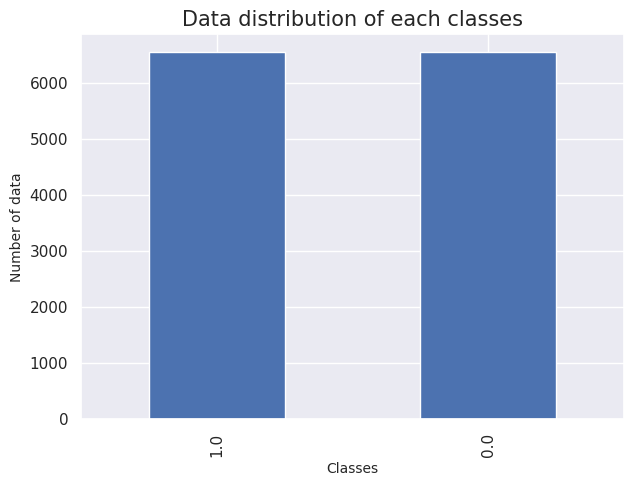

In [17]:
df_balanced['Swarm_Behaviour'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distribution of each classes', fontsize = 15)
plt.xlabel('Classes', fontsize = 10)
plt.ylabel('Number of data', fontsize = 10)
plt.show()

In [18]:
df_balanced.describe()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
count,13088.000000,13088.000000,13088.000000,13088.000000,13088.000000,13088.000000,13088.000000,13088.000000,13088.000000,13088.000000,...,13088.000000,13088.000000,13088.000000,13088.000000,13088.000000,13088.000000,13088.000000,13088.000000,13088.000000,13088.000000
mean,116.347155,-97.822002,-1.184296,1.024059,-0.168456,0.219662,-0.790347,-0.517206,-0.058729,0.114979,...,1.033076,-0.136495,0.184472,-1.252148,-0.110275,-0.004496,0.120529,28.466534,2.831983,0.500000
std,843.464805,567.925183,6.120276,7.250802,0.389821,0.608494,22.378662,17.473299,0.651957,0.726464,...,7.496573,0.401978,0.589474,65.371235,6.250614,0.648556,0.710097,36.099898,8.623084,0.500019
min,-1414.140000,-1012.180000,-18.590000,-18.410000,-1.000000,-1.000000,-944.070000,-847.910000,-2.680000,-2.680000,...,-18.370000,-1.040000,-1.000000,-4079.230000,-370.240000,-2.680000,-2.680000,0.000000,0.000000,0.000000
25%,-508.390000,-634.542500,-6.060000,-4.460000,-0.320000,0.000000,0.000000,0.000000,-0.120000,-0.050000,...,-4.510000,-0.260000,0.000000,0.000000,0.000000,-0.140000,-0.010000,3.000000,0.000000,0.000000
50%,153.085000,-199.110000,-0.575000,0.110000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.590000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.500000
75%,915.077500,390.740000,2.390000,7.870000,0.000000,1.000000,0.000000,0.000000,0.000000,0.402500,...,7.950000,0.000000,0.990000,0.000000,0.000000,0.000000,0.220000,38.000000,1.000000,1.000000
max,1403.720000,1015.800000,18.470000,18.570000,1.000000,1.040000,68.560000,234.740000,2.680000,2.680000,...,18.490000,1.000000,1.040000,255.990000,57.840000,2.680000,2.680000,142.000000,64.000000,1.000000


In [19]:
X = df_balanced.drop(columns = ['Swarm_Behaviour'])
y = df_balanced['Swarm_Behaviour']

In [20]:
le = LabelEncoder()

In [21]:
y_le = le.fit_transform(y)

In [22]:
X_s, y_s = shuffle(X, y_le)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size = 0.2, random_state = 101, shuffle = True, stratify = y_s)

In [24]:
print('The training set size is:', len(X_train))
print('The test set size is:', len(X_test))

The training set size is: 10470
The test set size is: 2618


In [25]:
scaler = StandardScaler()

In [26]:
X_train_scaled = scaler.fit_transform(X_train)

In [27]:
X_test_scaled = scaler.fit_transform(X_test)

In [28]:
X_train_scaled.shape

(10470, 2400)

In [29]:
model = Sequential()

In [30]:
model.add(Input(shape = (2400,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [31]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [32]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 2)

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │          38,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,433 (150.13 KB)

 Trainable params: 38,433 (150.13 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
begin = time.time()

In [35]:
history = model.fit(X_train_scaled, y_train, validation_split = 0.1, epochs = 100, callbacks = [early_stopping])

Epoch 1/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8637 - loss: 0.2751 - val_accuracy: 0.8691 - val_loss: 0.1924
Epoch 2/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8997 - loss: 0.1745 - val_accuracy: 0.8988 - val_loss: 0.1888
Epoch 3/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9057 - loss: 0.1714 - val_accuracy: 0.8863 - val_loss: 0.1977
Epoch 4/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9038 - loss: 0.1719 - val_accuracy: 0.9007 - val_loss: 0.1945


In [36]:
time.sleep(1)

In [37]:
end = time.time()

In [38]:
print(f'Total runtime of the model is {end - begin}')

Total runtime of the model is 6.7588417530059814


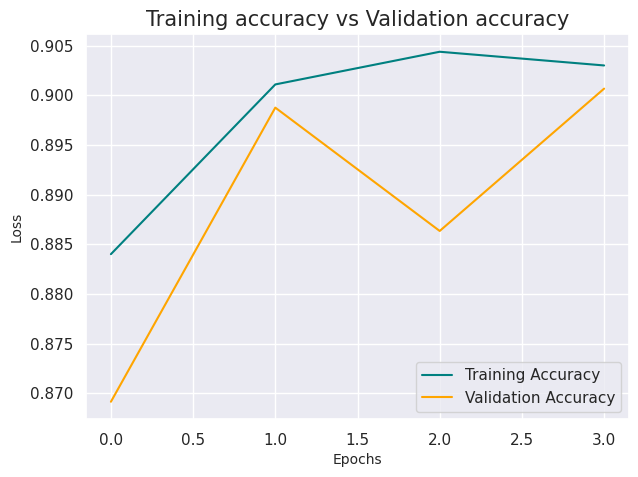

In [39]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training accuracy vs Validation accuracy', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

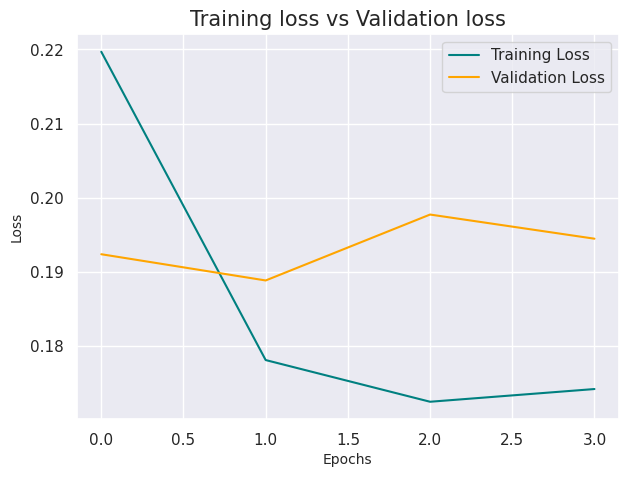

In [40]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training loss vs Validation loss', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [41]:
model2 = Sequential()

In [42]:
model2.add(Input(shape = (2400,)))
model2.add(Dense(16, activation = 'relu', kernel_regularizer = regularizers.L1(0.01)))
model2.add(Dense(1, activation = 'sigmoid'))

In [43]:
model2.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [44]:
early_stopping2 = EarlyStopping(monitor = 'val_loss', patience = 2)

In [45]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 16)                  │          38,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,433 (150.13 KB)

 Trainable params: 38,433 (150.13 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
begin = time.time()

In [47]:
history2 = model2.fit(X_train_scaled, y_train, validation_split = 0.1, epochs = 100, callbacks = [early_stopping2])

Epoch 1/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8523 - loss: 3.6528 - val_accuracy: 0.8959 - val_loss: 0.6110
Epoch 2/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8796 - loss: 0.6052 - val_accuracy: 0.8787 - val_loss: 0.5720
Epoch 3/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8775 - loss: 0.6005 - val_accuracy: 0.8663 - val_loss: 0.5549
Epoch 4/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8826 - loss: 0.5710 - val_accuracy: 0.8797 - val_loss: 0.5523
Epoch 5/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8827 - loss: 0.5587 - val_accuracy: 0.8777 - val_loss: 0.5187
Epoch 6/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8845 - loss: 0.5353 - val_accuracy: 0.8854 - val_loss: 0.4678
Epoch 7/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8732 - loss: 0.5060 - val_accuracy: 0.8596 - val_loss: 0.4865
Epoch 8/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8845 - loss: 0.4920 - val_accu

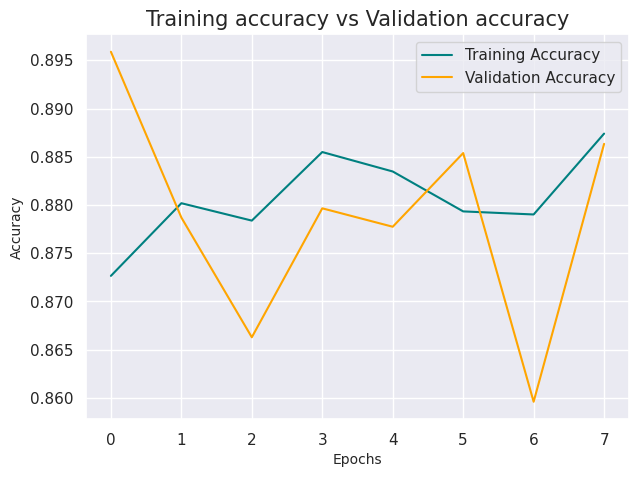

In [48]:
plt.figure(figsize = (7, 5))
plt.plot(history2.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history2.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training accuracy vs Validation accuracy', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

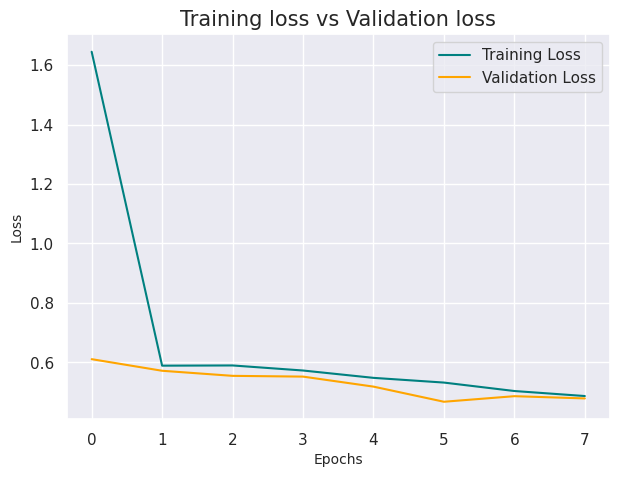

In [49]:
plt.figure(figsize = (7, 5))
plt.plot(history2.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history2.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training loss vs Validation loss', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [50]:
time.sleep(1)

In [51]:
end = time.time()

In [52]:
print(f'Total runtime of the model is {end - begin}')

Total runtime of the model is 11.879539489746094


In [53]:
model3 = Sequential()

In [54]:
model3.add(Input(shape = (2400,)))
model3.add(Dense(16, activation = 'relu', kernel_regularizer = regularizers.L2(0.01)))
model3.add(Dense(1, activation = 'sigmoid'))

In [55]:
model3.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [56]:
early_stopping3 = EarlyStopping(monitor = 'val_loss', patience = 2)

In [57]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 16)                  │          38,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,433 (150.13 KB)

 Trainable params: 38,433 (150.13 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
begin = time.time()

In [59]:
history3 = model3.fit(X_train_scaled, y_train, validation_split = 0.1, epochs = 100, callbacks = [early_stopping3])

Epoch 1/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8706 - loss: 0.4754 - val_accuracy: 0.9064 - val_loss: 0.2729
Epoch 2/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8968 - loss: 0.2486 - val_accuracy: 0.8921 - val_loss: 0.2312
Epoch 3/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8925 - loss: 0.2198 - val_accuracy: 0.8921 - val_loss: 0.2098
Epoch 4/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9001 - loss: 0.2053 - val_accuracy: 0.8883 - val_loss: 0.2199
Epoch 5/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9026 - loss: 0.2030 - val_accuracy: 0.9035 - val_loss: 0.2157


In [60]:
time.sleep(1)

In [61]:
end = time.time()

In [62]:
print(f'Total runtime of the model is {end - begin}')

Total runtime of the model is 7.8030006885528564


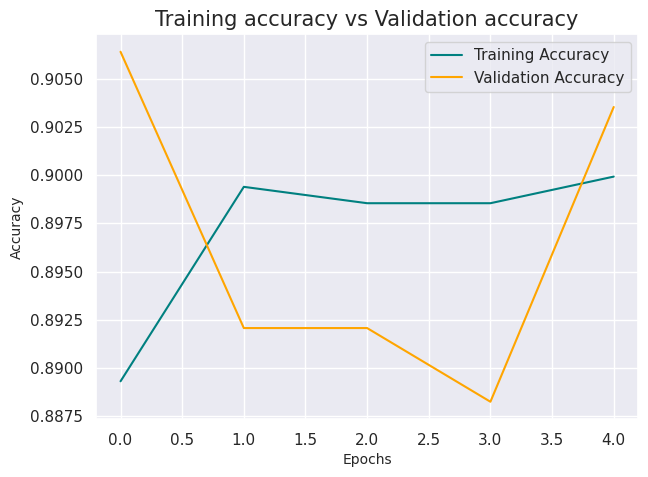

In [63]:
plt.figure(figsize = (7, 5))
plt.plot(history3.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history3.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training accuracy vs Validation accuracy', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

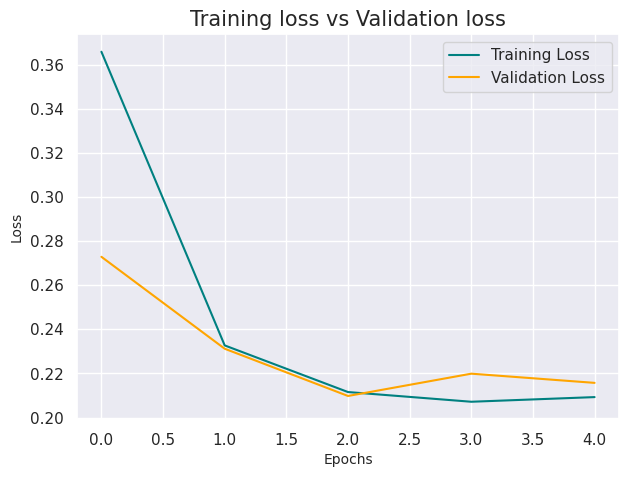

In [64]:
plt.figure(figsize = (7, 5))
plt.plot(history3.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history3.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training loss vs Validation loss', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [65]:
model4 = Sequential()

In [66]:
model4.add(Input(shape = (2400,)))
model4.add(Dense(16, activation = 'relu'))
model4.add(Dropout(0.2))
model4.add(Dense(1, activation = 'sigmoid'))

In [67]:
model4.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [68]:
early_stopping4 = EarlyStopping(monitor = 'val_loss', patience = 2)

In [69]:
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │          38,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,433 (150.13 KB)

 Trainable params: 38,433 (150.13 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
begin = time.time()

In [71]:
history4 = model4.fit(X_train_scaled, y_train, validation_split = 0.1, epochs = 100, callbacks = [early_stopping4])

Epoch 1/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8549 - loss: 0.2944 - val_accuracy: 0.8921 - val_loss: 0.1896
Epoch 2/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9041 - loss: 0.1780 - val_accuracy: 0.8720 - val_loss: 0.1897
Epoch 3/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8992 - loss: 0.1736 - val_accuracy: 0.8816 - val_loss: 0.1908


In [72]:
time.sleep(1)

In [73]:
end = time.time()

In [74]:
print(f'Total runtime of the model is {end - begin}')

Total runtime of the model is 5.7579381465911865


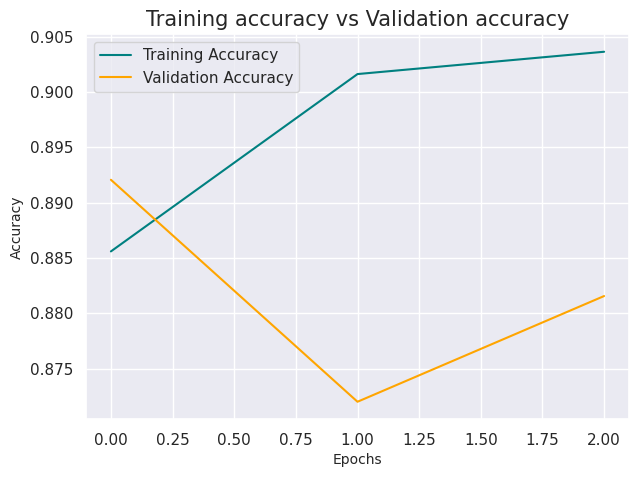

In [75]:
plt.figure(figsize = (7, 5))
plt.plot(history4.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history4.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training accuracy vs Validation accuracy', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

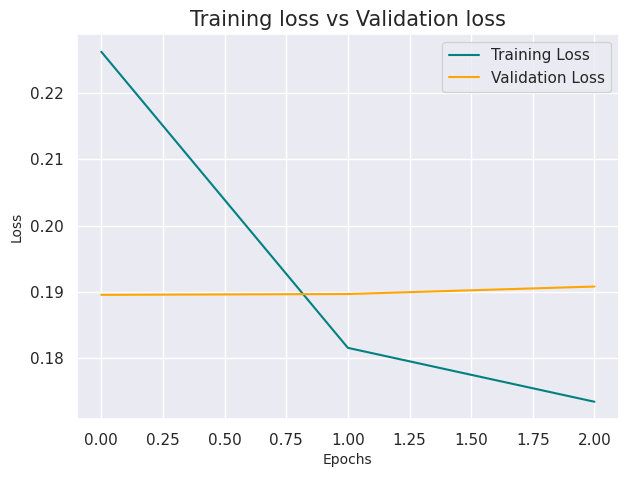

In [76]:
plt.figure(figsize = (7, 5))
plt.plot(history4.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history4.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training loss vs Validation loss', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [77]:
mean = 0
std_dev = 0.1
noise = np.random.normal(mean, std_dev, X_train_scaled.shape)

In [78]:
X_train_noisy = X_train_scaled + noise

In [79]:
X_train_scaled

array([[-1.46860511,  0.53138594, -0.23046309, ..., -0.16885821,
        -0.79021766, -0.33140274],
       [-1.01304562, -0.3708535 , -1.02904331, ..., -0.18283627,
         1.17302601, -0.10192708],
       [ 0.23763447, -0.96723531,  0.09942077, ..., -0.16885821,
        -0.45840183, -0.33140274],
       ...,
       [ 0.34397525,  1.23861334,  1.74230768, ..., -0.28068272,
        -0.67961238, -0.33140274],
       [ 1.12499548, -0.91939983,  0.14188107, ...,  1.22894812,
        -0.48605315, -0.10192708],
       [-0.31383604,  0.27998063,  0.71182891, ..., -0.16885821,
        -0.76256634, -0.33140274]])

In [80]:
X_train_noisy

array([[-1.49501674,  0.61088462, -0.26550814, ..., -0.18313691,
        -0.70608198, -0.3354029 ],
       [-1.04833891, -0.34010568, -1.05451287, ...,  0.05959593,
         1.11847471, -0.19354489],
       [ 0.30415558, -1.10563692,  0.14375075, ..., -0.05865138,
        -0.38640925, -0.2908617 ],
       ...,
       [ 0.43357174,  1.13901577,  1.60299838, ..., -0.25167281,
        -0.66350217, -0.29483402],
       [ 1.20937669, -0.70656201,  0.14373699, ...,  1.31969451,
        -0.5679125 , -0.00951163],
       [-0.33774997,  0.36856085,  0.74666392, ..., -0.11690325,
        -0.95695745, -0.33823871]])

In [105]:
model8 = Sequential()

In [106]:
model8.add(Input(shape = (2400,)))
model8.add(Dense(16, activation = 'relu'))
model8.add(Dense(1, activation = 'sigmoid'))

In [107]:
model8.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [108]:
early_stopping8 = EarlyStopping(monitor = 'val_loss', patience = 2)

In [109]:
history5 = model8.fit(X_train_noisy, y_train, validation_split = 0.1,epochs = 100, callbacks = [early_stopping8])

Epoch 1/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8462 - loss: 0.2981 - val_accuracy: 0.8968 - val_loss: 0.1970
Epoch 2/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9022 - loss: 0.1819 - val_accuracy: 0.8930 - val_loss: 0.1901
Epoch 3/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9045 - loss: 0.1736 - val_accuracy: 0.8997 - val_loss: 0.1862
Epoch 4/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8991 - loss: 0.1778 - val_accuracy: 0.9026 - val_loss: 0.1919
Epoch 5/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9126 - loss: 0.1588 - val_accuracy: 0.8902 - val_loss: 0.1931


In [114]:
model8.evaluate(X_test_scaled, y_test)

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8996 - loss: 0.1778


[0.17733898758888245, 0.8987776637077332]

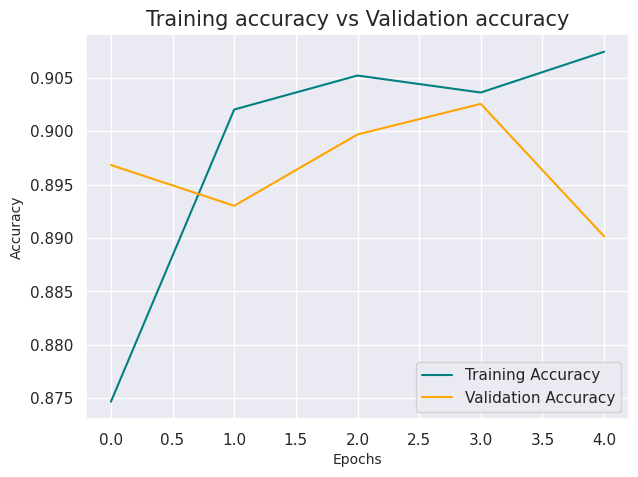

In [115]:
plt.figure(figsize = (7, 5))
plt.plot(history5.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history5.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training accuracy vs Validation accuracy', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

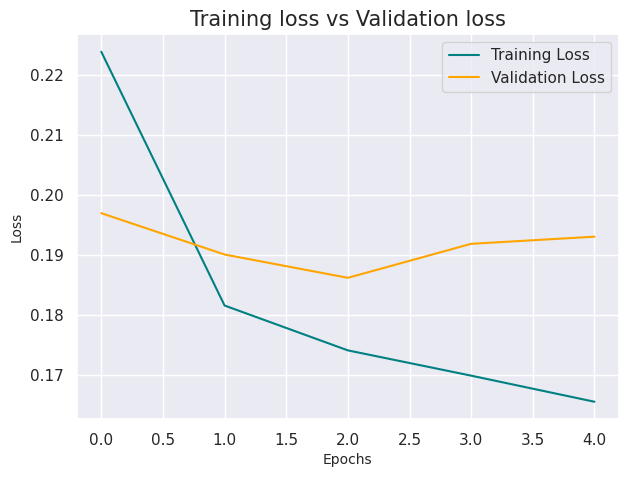

In [116]:
plt.figure(figsize = (7, 5))
plt.plot(history5.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history5.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training loss vs Validation loss', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [117]:
y_p = model8.predict(X_test_scaled)

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [118]:
y_pred = np.where(y_p > 0.5, 1, 0)

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1309
           1       0.85      0.96      0.90      1309

    accuracy                           0.90      2618
   macro avg       0.91      0.90      0.90      2618
weighted avg       0.91      0.90      0.90      2618



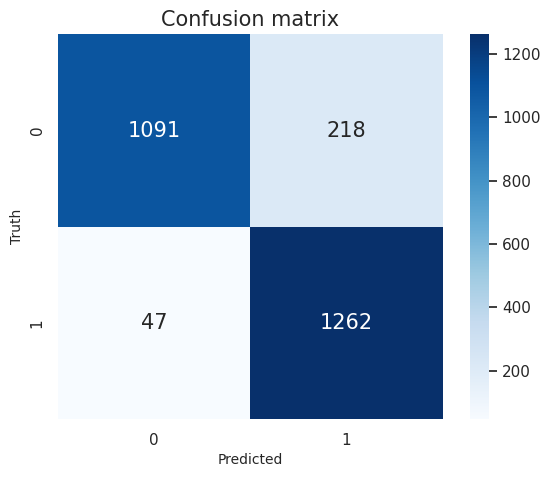

In [121]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, square = True, cbar = True, annot_kws = {'size': 15}, fmt = 'd', cmap = 'Blues')
plt.title('Confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()